In [141]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

#### CHAMAR API YAHOO FINANCES

ativo = 'SUZB3'

chamada_api = yf.Ticker(ativo+'.SA')

hist = chamada_api.history(period='48mo',interval = '1d')

hist



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-11,35.076728,35.375046,34.143272,34.354984,5681500,0.0,0
2018-04-12,34.499329,35.018985,34.104777,34.980492,3626500,0.0,0
2018-04-13,35.124843,35.288437,34.499331,34.884262,2424700,0.0,0
2018-04-16,34.547452,35.634876,34.374234,35.471283,3073700,0.0,0
2018-04-17,35.538648,36.462479,35.529023,36.462479,4595200,0.0,0
...,...,...,...,...,...,...,...
2022-04-05,54.790001,55.459999,53.919998,54.169998,6634800,0.0,0
2022-04-06,54.189999,55.759998,54.189999,55.340000,7346500,0.0,0
2022-04-07,55.320000,55.380001,54.290001,54.470001,5138700,0.0,0


In [142]:
precos_list = hist['Close']
precos_list

Date
2018-04-11    34.354984
2018-04-12    34.980492
2018-04-13    34.884262
2018-04-16    35.471283
2018-04-17    36.462479
                ...    
2022-04-05    54.169998
2022-04-06    55.340000
2022-04-07    54.470001
2022-04-08    54.500000
2022-04-11    54.779999
Name: Close, Length: 990, dtype: float64

In [143]:


# #### SEPARAR VALORES

precos_list = hist['Close'].values
datas_precos_list = hist.index

#### TRATAR DIVIDENDOS (LIMPAR OS ZEROS)
dividendos_dif_zero = hist['Dividends'][hist['Dividends'] != 0]


In [144]:

dividendos_list = dividendos_dif_zero.values
datas_dividendos_list = dividendos_dif_zero.index




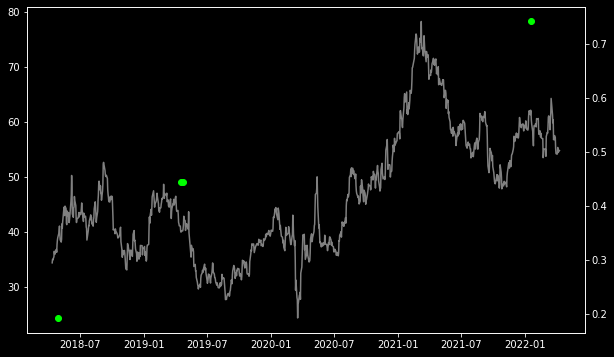

In [145]:

#### PLOTAR DADOS SEM TRATAMENTO

fig, ax1 = plt.subplots(1,1,figsize = (10,6))
ax1.plot(datas_precos_list,precos_list, color = 'grey')
ax2 = ax1.twinx()
ax2.scatter(datas_dividendos_list,dividendos_list,color = 'lime')
plt.show()

In [146]:

#### CRIAR FUNÇÃO PARA CALCULAR INDICADORES TÉCNICOS

def media_movel(lista,periodos):
    lista_indicador = []
    if len(lista) < periodos:
        print('Amostra insuficiente')
        return lista_indicador
    else:
        for i in range(periodos):
            lista_indicador.append(0)
        for j in range(len(lista)-periodos):
            indicador = np.mean(lista[j:j+periodos])
            lista_indicador.append(indicador)
        return lista_indicador

def ifr(lista,periodos):
    lista_indicador = []
    if len(lista) < periodos:
        print('Amostra insuficiente')
        return lista_indicador
    else:
        list_returns = [(lista[i] / lista[i-1])-1 for i in range(len(lista))]
        for i in range(periodos):
            lista_indicador.append(0)
        for j in range(len(list_returns)-periodos):
            positivo = np.mean([(x if x > 0 else 0) for x in list_returns[j:j+periodos]])
            negativo = np.mean([abs(x if x < 0 else 0) for x in list_returns[j:j+periodos]])
            #### IFR = (100 - (100/(1+POSITIVO/NEGATIVO)))
            indicador = (100 - (100/(1+positivo/negativo))) if negativo > 0 else 100
            lista_indicador.append(indicador)
        return lista_indicador

periodos_mm = 100
periodos_ifr = 14
print(len(precos_list))
print(len(media_movel(precos_list,periodos_mm)))   
print(len(ifr(precos_list,periodos_ifr)))



990
990
990


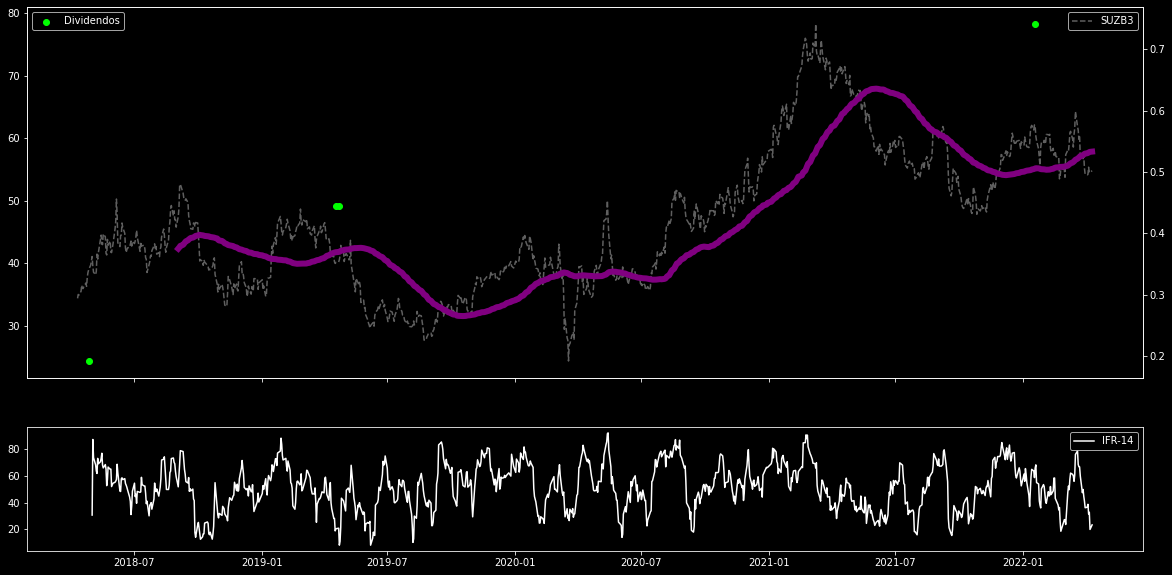

In [147]:

#### PLOTAR
style.use('dark_background')
fig1, [ax1,ax2] = plt.subplots(2,1,figsize = (20,10),gridspec_kw={'height_ratios': [3, 1]},sharex = True)
ax1.plot(datas_precos_list,precos_list, color = 'grey',linestyle = 'dashed',alpha = 0.75)
ax1.plot(datas_precos_list[periodos_mm:],media_movel(precos_list,periodos_mm)[periodos_mm:],color = 'purple',linewidth = 6)
ax2.plot(datas_precos_list[periodos_ifr:],ifr(precos_list,periodos_ifr)[periodos_ifr:],color = 'white')
ax1.legend([ativo])
ax2.legend(['IFR-{}'.format(periodos_ifr)])
ax3 = ax1.twinx()
ax3.scatter(datas_dividendos_list,dividendos_list,color = 'lime')
ax3.legend(['Dividendos'],loc='upper left')
plt.show()